# Load Dataset Fashion MNIST

In [1]:
# Load dataset
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

C:\Users\SP.000\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SP.000\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SP.000\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SP.000\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: P

# Create LabelMap

In [2]:
# Create a list of labelMap
labelMap = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Import model functions, layers

In [3]:
# Import model functions, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt

# Data Exploration

Training Images:  (60000, 28, 28) Training Labels:  (60000,)
Testing Images:  (10000, 28, 28) Testing Labels:  (10000,)
Total number of outputs/ Number of classes:  10
Classes: [0 1 2 3 4 5 6 7 8 9]


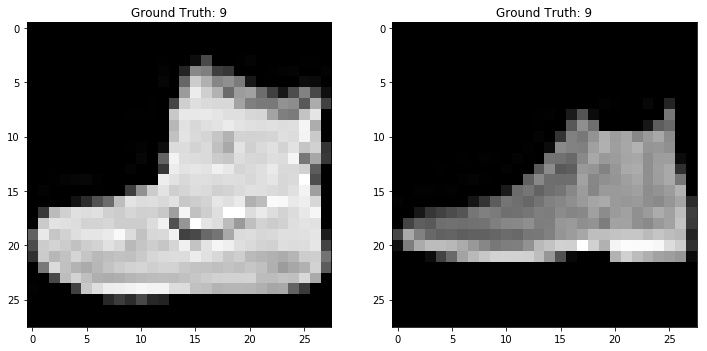

In [4]:
# Data Exploration
print("Training Images: ", train_images.shape, "Training Labels: ", train_labels.shape)
print("Testing Images: ", test_images.shape, "Testing Labels: ", test_labels.shape)
labels = np.unique(train_labels)
nClasses = len(labels)
print("Total number of outputs/ Number of classes: ",nClasses)
print("Classes: {}".format(labels))
plt.figure(figsize=(12,12));
plt.subplot(121);plt.imshow(train_images[0], cmap='gray');plt.title("Ground Truth: {}".format(train_labels[0]));
plt.subplot(122);plt.imshow(test_images[0], cmap='gray');plt.title("Ground Truth: {}".format(test_labels[0]));

# PreProcess the data such as 
## converting to floats
## data normalization
## reshape the data
## converting labels to onehot encoding

In [5]:
# Process the data
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [6]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [7]:
# Convert labels to one hot encoding annotation as it required by Keras for performing multiclass classification.
# One-Hot encoding is a type of number representation of categorical data(it can be either a string or an integer)
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print("Original label 0: ",train_labels[0])
print("After conversion to categorical (one-hot): ", train_labels_one_hot[0])

Original label 0:  9
After conversion to categorical (one-hot):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Model Initialization/ Creation
## Adding layers to the model

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


# Compile Model

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary and Model Configuration

In [10]:
print("=====MODEL SUMMARY=====")
print(model.summary())
print("=====MODEL CONFIGURATION=====")
print(model.get_config())

=====MODEL SUMMARY=====
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None
=====MODEL CONFIGURATION=====
{'name': 'sequential', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None, 'dtype': 'float32'}}, 'bias_initializer': {'class

# Model Fit/ Train the Model

In [11]:
history = model.fit(x=train_data, y=train_labels_one_hot, batch_size=256, epochs=20, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
48000/48000 [==============================] - 8s 175us/sample - loss: 0.5439 - acc: 0.8077 - val_loss: 0.4064 - val_acc: 0.8547
Epoch 2/20
48000/48000 [==============================] - 6s 135us/sample - loss: 0.3658 - acc: 0.8658 - val_loss: 0.3926 - val_acc: 0.8513
Epoch 3/20
48000/48000 [==============================] - 7s 137us/sample - loss: 0.3305 - acc: 0.8782 - val_loss: 0.3336 - val_acc: 0.8791
Epoch 4/20
48000/48000 [==============================] - 7s 140us/sample - loss: 0.3027 - acc: 0.8885 - val_loss: 0.3451 - val_acc: 0.8782
Epoch 5/20
48000/48000 [==============================] - 7s 139us/sample - loss: 0.2797 - acc: 0.8962 - val_loss: 0.3256 - val_acc: 0.8832
Epoch 6/20
48000/48000 [==============================] - 7s 143us/sample - loss: 0.2671 - acc: 0.9003 - val_loss: 0.3349 - val_acc: 0.8784
Epoch 7/20
48000/48000 [==============================] - 7s 1

# Evaluate Trained Model

In [12]:
# Evaluate Trained Model
model.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 1s 115us/sample - loss: 0.3589 - acc: 0.8901


[0.3589038721501827, 0.8901]

In [16]:
help(history)

Help on History in module tensorflow.python.keras.callbacks object:

class History(Callback)
 |  Callback that records events into a `History` object.
 |  
 |  This callback is automatically applied to
 |  every Keras model. The `History` object
 |  gets returned by the `fit` method of models.
 |  
 |  Method resolution order:
 |      History
 |      Callback
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  on_epoch_end(self, epoch, logs=None)
 |  
 |  on_train_begin(self, logs=None)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Callback:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  on_batch_begin(self, batch, logs=None)
 |  
 |  on_batch_end(self, batch, logs=None)
 |  
 |  on_epoch_begin(self, epoch, logs=None)
 |  
 |  on_train_batch_begin(self, batch, logs=None)
 |  
 |  on_train_batch_end(self, batch, logs=None)
 |  
 |  on_train_end(self, logs=Non

# Check the loss and Accuray to find out if there is any overfitting

Text(0.5,1,'Accuracy Curves')

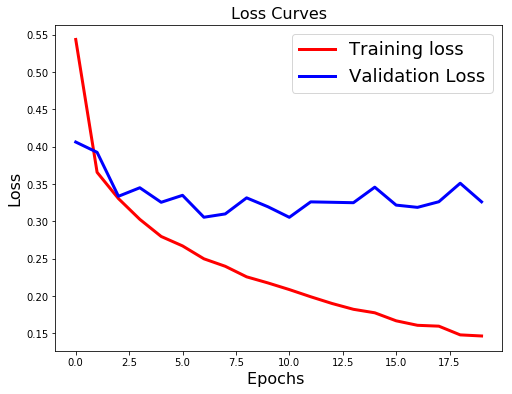

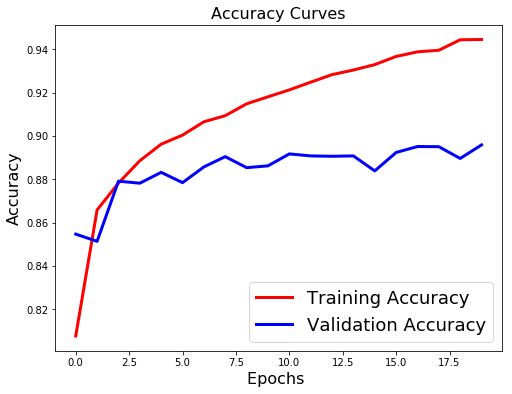

In [18]:
# Check for overfitting
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Adding Regularization to prevent overfitting of the model on training dataset. We will be adding Dropout layer which will set 50% of the layers to off while training reducing the dependency on the training set

In [14]:
# Add Regulaarization to the model. This function is added in the case of overfitting when the model is bias towards training data
# that means that the network has been over trained on a particular set of data upto extent that it is not able to make predictions
# with the test data which it has not seen before. It is not able to differentiate between what it has learned from training data
# to what it has been tested on?
from tensorflow.keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Text(0.5,1,'Accuracy Curves')

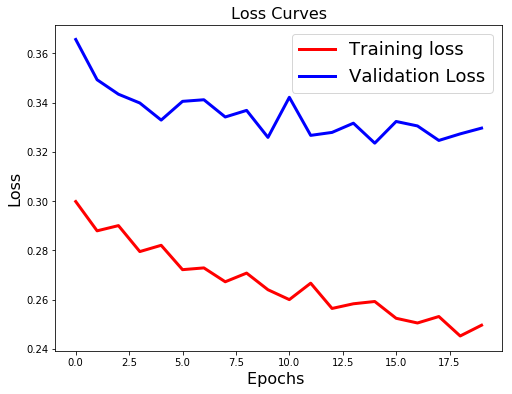

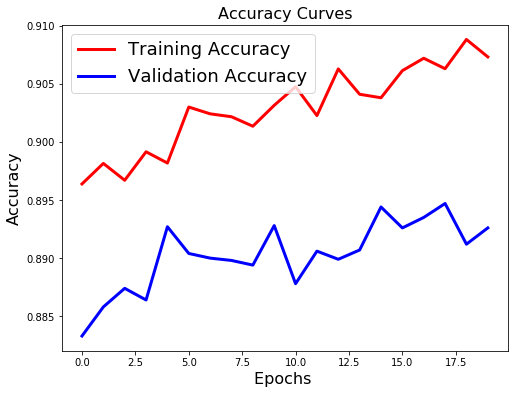

In [24]:
model_reg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# To see detail output, change verbose to True
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=False, 
                            validation_data=(test_data, test_labels_one_hot))
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

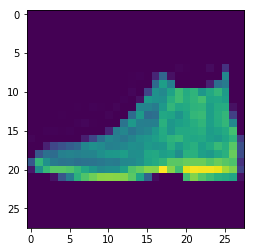

In [25]:
testSample = test_images[0,:,:]
plt.imshow(testSample)

# Predict Class and Class accuracy

In [26]:
# Predict the most likely class
label = model_reg.predict_classes(test_data[[0],:])[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))

Label = 9, Item = Ankle boot


In [27]:
# Predict the probabilities for each class 
prob = model_reg.predict(test_data[[0],:])
labelProb = prob[0][label]
print("Probability = {:.3f}".format(labelProb))

Probability = 1.000
